# **1. Introduction**


Supermarket ABC is a retail company striving to understand customer needs and behavior to enhance its service quality and marketing strategies. In this effort, customer data becomes a vital asset for analyzing shopping preferences, responses to promotions, and the effectiveness of sales channels.



## 1.1 The Data Set


The "Supermarket Customers" dataset contains 29 variables covering customer demographics, purchasing behavior, promotional responses, and sales channel preferences. Key features include:

Customer Details: Unique ID, birth year, education, marital status, household income, and family composition (children and teenagers).
Purchase Data: Amount spent on various products (e.g., wine, meat, fish, fruits) over two years.
Promotional Campaigns: Responses to five campaigns and a final campaign indicator.
Sales Channels: Number of purchases via web, catalog, and in-store, along with website visit frequency.

link of the Data Set : [Supermarket Customer DataSet](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK)

### Detailed Explanation

### Supermarket Customers Data Dictionary

#### People
- **ID**: Customer's unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Customer's education level
- **Marital_Status**: Customer's marital status
- **Income**: Customer's yearly household income
- **Kidhome**: Number of children in customer's household
- **Teenhome**: Number of teenagers in customer's household
- **Dt_Customer**: Date of customer's enrollment with the company
- **Recency**: Number of days since customer's last purchase
- **Complain**: `1` if the customer complained in the last 2 years, `0` otherwise

#### Products
- **MntWines**: Amount spent on wine in the last 2 years
- **MntFruits**: Amount spent on fruits in the last 2 years
- **MntMeatProducts**: Amount spent on meat in the last 2 years
- **MntFishProducts**: Amount spent on fish in the last 2 years
- **MntSweetProducts**: Amount spent on sweets in the last 2 years
- **MntGoldProds**: Amount spent on gold in the last 2 years

#### Promotion
- **NumDealsPurchases**: Number of purchases made with a discount
- **AcceptedCmp1**: `1` if the customer accepted the offer in the 1st campaign, `0` otherwise
- **AcceptedCmp2**: `1` if the customer accepted the offer in the 2nd campaign, `0` otherwise
- **AcceptedCmp3**: `1` if the customer accepted the offer in the 3rd campaign, `0` otherwise
- **AcceptedCmp4**: `1` if the customer accepted the offer in the 4th campaign, `0` otherwise
- **AcceptedCmp5**: `1` if the customer accepted the offer in the 5th campaign, `0` otherwise
- **Response**: `1` if the customer accepted the offer in the last campaign, `0` otherwise

#### Place
- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made using a catalog
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to the company’s website in the last month

## **1.2 Business Problem**


### Potential Business Problems to Analyze


From the given dataset, we can identify and address various business-related questions, including:



**1. Customer Segmentation**

Which customer segments are the most valuable based on spending habits and demographics from customers Segment such us age, marital status, income, and purchase behavior.
Identify high-value customers by analyzing Income and spending metrics (`MntWines`, `MntMeatProducts`, etc.).

**2. Marketing Campaign Performance**

Which marketing campaigns are the most successful using columns like `AcceptedCmp1`, `AcceptedCmp2`, ..., Response to determine the effectiveness of campaigns.
Analyze customer responses and correlate them with spending behaviors and demographics.


**3. Sales Performance**

Which product categories drive the most revenue by analyzing spending metrics (`MntWines`, `MntFruits`, `MntMeatProducts`, etc.) and to identify top-performing product categories.

**4. Channel Performance**

Which purchase channels (web, catalog, store) are most effective? using collumn like `NumWebPurchases`, `NumCatalogPurchases`, and `NumStorePurchases` to determine customer preferences for shopping channels.

**5.Customer Retention**

What factors contribute to customer churn or loyalty using  recency (Recency) and frequency of purchases.
Investigate whether customers with complaints (Complain) are less likely to respond to campaigns.

**6. Impact of Family Dynamics on Spending**

 How do family size and composition influence customer spending using `Kidhome` and `Teenhome` to analyze the effect of children on purchasing behavior.


**7. Customer Acquisition Costs**


Are marketing costs justified by revenue
Determined by the ROI for marketing campaigns.

# **2. Data Preparation**

## **2.0 Importing Libraries and Other Setting**

In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

#Setup
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## **2.1. Data Understanding**

Before diving into the analysis, we need to understand our dataset further so that can identify any anomalies present in the dataset that need to be addressed during the data cleaning phase. Each anomaly-handling step will be accompanied by a justification for the actions taken, whether based on domain knowledge or statistical considerations.

In [ ]:
df = pd.read_csv("Supermarket Customers.csv",  sep='\t') #read the csv into the dataframe

display(df.head(), df.tail()) #display the first and last 5 rows of the dataframe

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.00,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.00,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.00,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.00,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.00,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [ ]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"info: \n{df.info()}")

The dataset has 2240 rows and 29 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 

In [ ]:
#statistic described

display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15
std,3246.66,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
25%,2828.25,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
75%,8427.75,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [ ]:
list = []

for col in df.columns:
    list.append([col, df[col].nunique(), df[col].unique()])

desc = pd.DataFrame(list, columns=['Variable', 'Distinct Values', 'Values'])
desc

,Variable,Distinct Values,Values
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


From this we can see that:


*  The dataset has 2240 rows and 29 columns.
*  from the data type can see that it is mostly integer, float and object, we can change `Dt_Customer` into timestamp datatype in the future
*  there are duiplicates in naming the variable, for example in education, "2n Cycle" and "Master" could be merge as one
*  the Marital_Status column has several categories like Married, Single, Divorced, Widow, as well as unexpected entries such as Absurd, Alone, and YOLO. we can clean the unexpected entry further in data cleaning
*  we can simply dropped Z_CostContact	1	and Z_Revenue due to its only unique value is one, in other word not useful

## **2.2 Data Cleaning**

### Missing Value

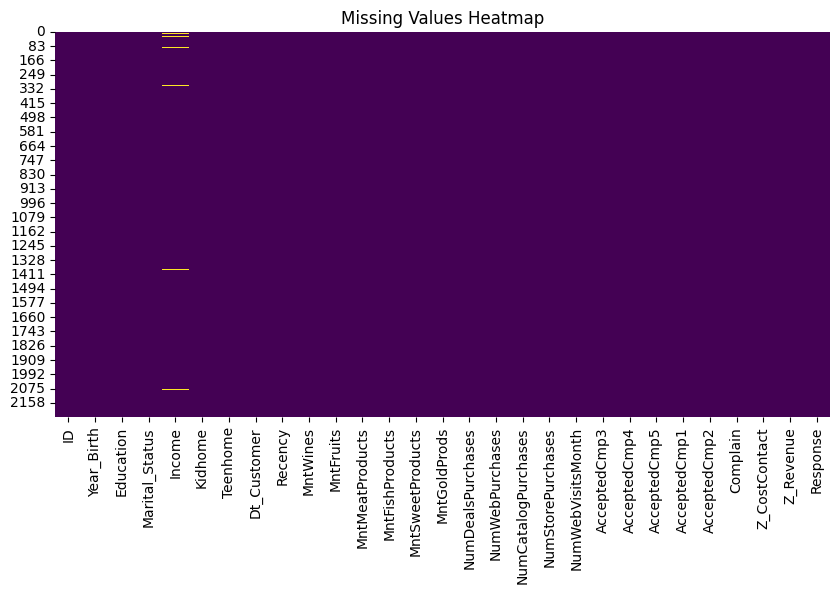

In [ ]:
#Heatmap of missing Value

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


 #### **Test for MAR or MCAR**

In [ ]:
def test_missing_values_randomness(data, col_with_missing):

    col_missing = data[col_with_missing].isnull()
    results = {}

    for col in data.columns:
        if col != col_with_missing and pd.api.types.is_numeric_dtype(data[col]):
            observed = pd.crosstab(col_missing, data[col])
            chi2, p, _, _ = chi2_contingency(observed)
            results[col] = p

    return results

# Test missingness for the 'Income' column
missing_p_values = test_missing_values_randomness(df, 'Income')

# Identify significant relationships (p < 0.05)
significant_columns = {k: v for k, v in missing_p_values.items() if v < 0.05}
significant_columns

{'Kidhome': 0.049526981433859654,
 'NumDealsPurchases': 0.00818136615373458,
 'NumWebPurchases': 1.6835648135184403e-06}

Missing Value Analysis: 'Income'

**Significant Relationships** (p < 0.05):  
- **Kidhome**: 0.0495  
- **NumDealsPurchases**: 0.0081  
- **NumWebPurchases**: 1.68e-06  

**Conclusion**:
 Since the p-values for these columns are less than 0.05, there is a statistically significant relationship between missing values in 'Income' and the variables Kidhome, NumDealsPurchases, and NumWebPurchases.
This indicates that the missingness in 'Income' is not completely at random (not MCAR).


TLDR;


Missing values in **'Income'** are **Missing at Random (MAR)**, as they depend on observed variables.



In [ ]:
df.isnull().sum()/len(df) * 100

,0
ID,0.00
Year_Birth,0.00
Education,0.00
Marital_Status,0.00
Income,1.07
Kidhome,0.00
Teenhome,0.00
Dt_Customer,0.00
Recency,0.00
MntWines,0.00


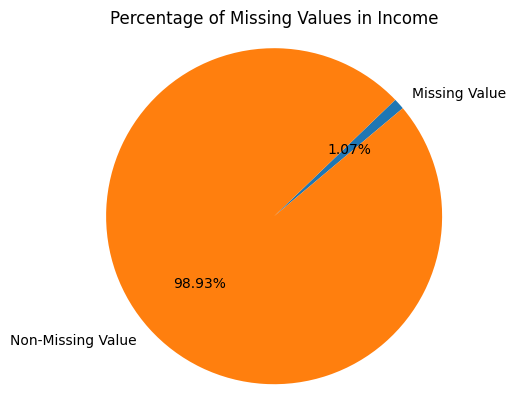

In [ ]:

missing_income_percentage = df['Income'].isnull().sum() / len(df) * 100
labels = ['Missing Value', 'Non-Missing Value']
sizes = [missing_income_percentage, 100 - missing_income_percentage]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=40)
ax.axis('equal')
ax.set_title(f'Percentage of Missing Values in Income')

plt.show()

as we can see due to the amount of missing value relatively small, we can simply just dropped it

In [ ]:
df.dropna(subset=['Income'], inplace=True)

df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


### Check For Duplicate

In [ ]:
df.duplicated().sum()

0

GREAT, no duplicate

### Data Correction

In [ ]:
# Cleaning 'Education' by merging '2n Cycle' and 'Master'
df['Education'] = df['Education'].replace({'2n Cycle': 'Master'})

# Cleaning unexpected entries in 'Marital_Status'
valid_status = ['Married', 'Single', 'Divorced', 'Widow', 'Together']
df['Marital_Status'] = df['Marital_Status'].apply(
    lambda x: x if x in valid_status else 'Other'
)

#  Dropping columns with only one unique value
columns_to_drop = [col for col in df.columns if df[col].nunique() == 1]
data_cleaned = df.drop(columns=columns_to_drop)

In [ ]:
pd.DataFrame.to_csv(data_cleaned, "data_cleaned.csv", index=False)


In [ ]:
list = []

for col in data_cleaned.columns:
    list.append([col, data_cleaned[col].nunique(), data_cleaned[col].unique()])

desc = pd.DataFrame(list, columns=['Variable', 'Distinct Values', 'Values'])
desc

,Variable,Distinct Values,Values
0,ID,2216,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,4,"[Graduation, PhD, Master, Basic]"
3,Marital_Status,6,"[Single, Together, Married, Divorced, Widow, O..."
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,662,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 59, 82, 5..."
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 6, 1..."


Reverse encode the acceptedCmp

In [ ]:
campaign_cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]

df_long = data_cleaned.reset_index().melt(
    id_vars="index",
    value_vars=campaign_cols,
    var_name="TempColName",
    value_name="Value"
)

df_long = df_long[df_long["Value"] == 1]

# Extract the campaign number from the column names
df_long["Campaign"] = df_long["TempColName"].str.replace("AcceptedCmp", "", regex=True).astype(int)

# Keep only the desired columns
df_long = df_long[["index", "Campaign"]].reset_index(drop=True)

data_cleaned = data_cleaned.join(df_long.set_index("index"), on="ID")

In [ ]:
data_cleaned.drop(columns=campaign_cols, inplace=True)

In [ ]:
data_cleaned.fillna(0, inplace=True)

In [ ]:
data_cleaned["Campaign"] = data_cleaned['Campaign'].astype(int)

In [ ]:
data_export = data_cleaned.copy()

pd.DataFrame.to_csv(data_export, "data_export.csv", index=False)

# **3. Data Analysis**
- Data visualization
- Insight

### **Statistical Analysis**

in statistical analysis we measure the central limit and the distribution of the data measured

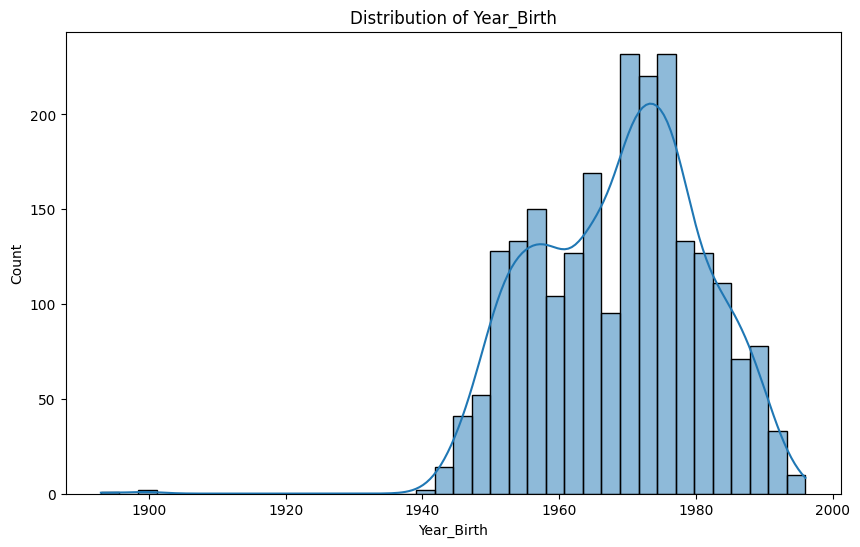

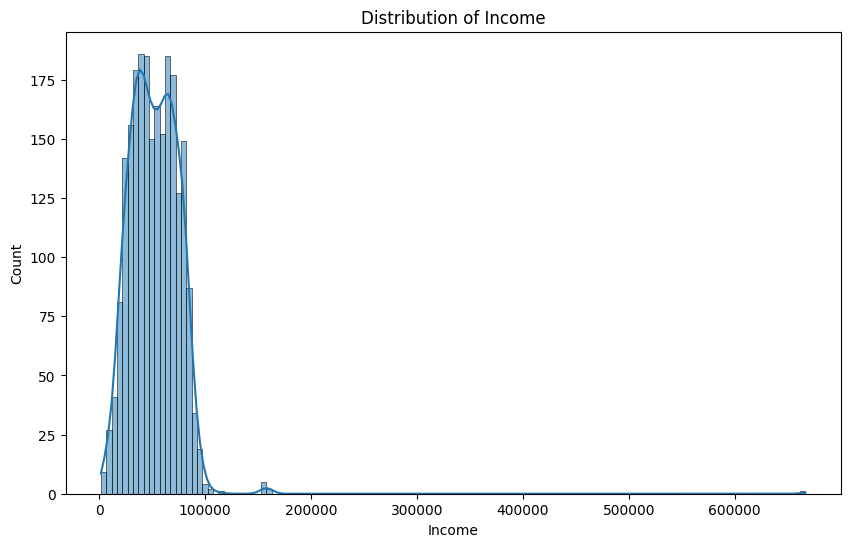

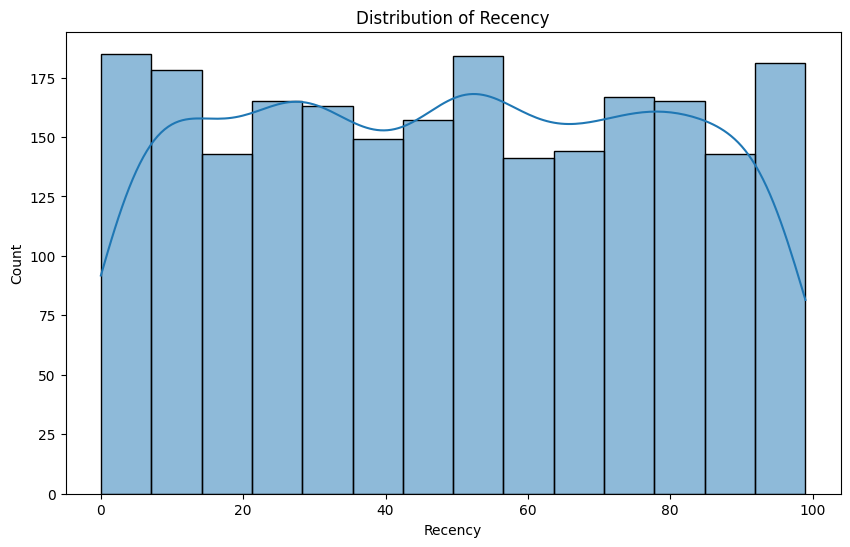

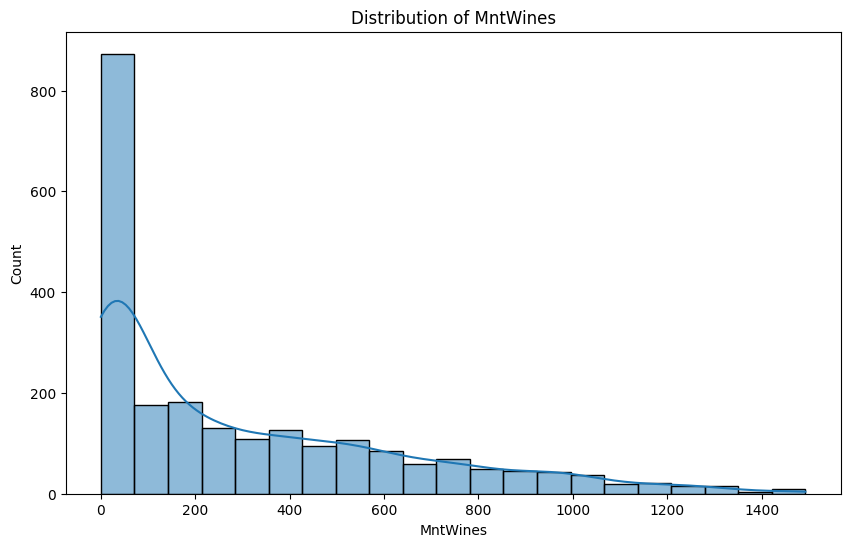

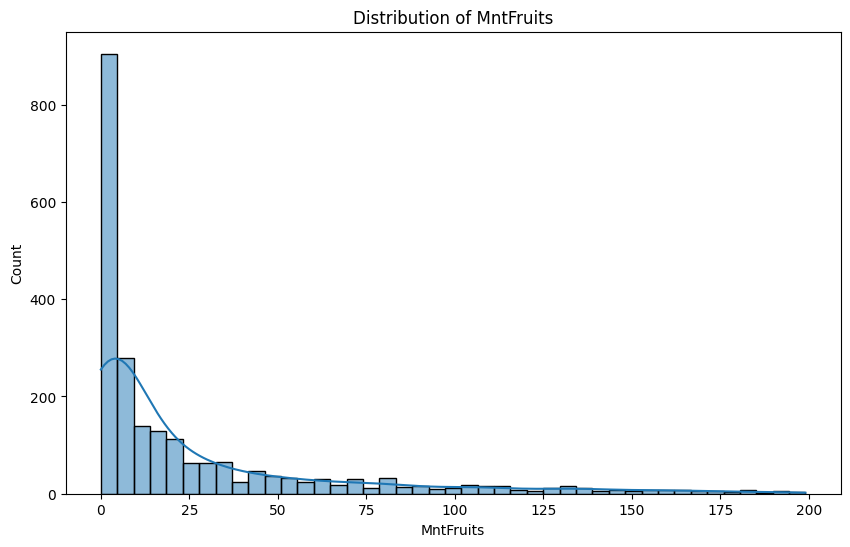

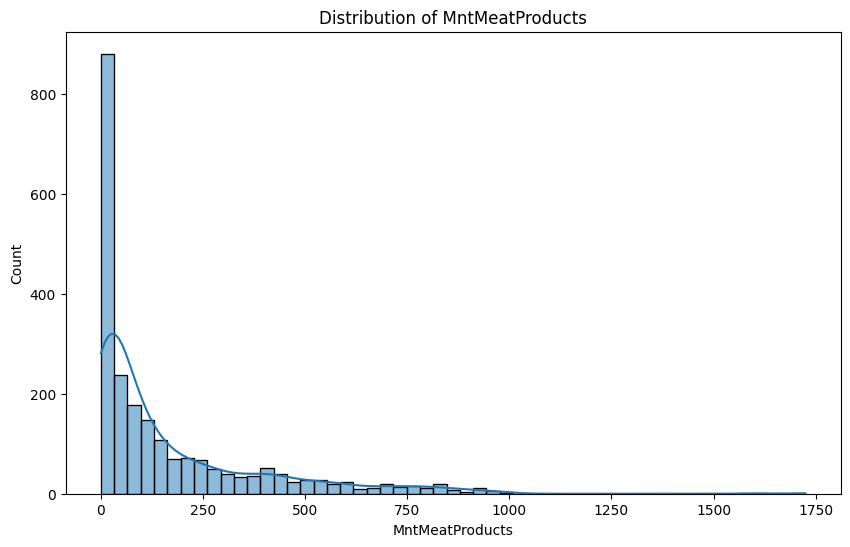

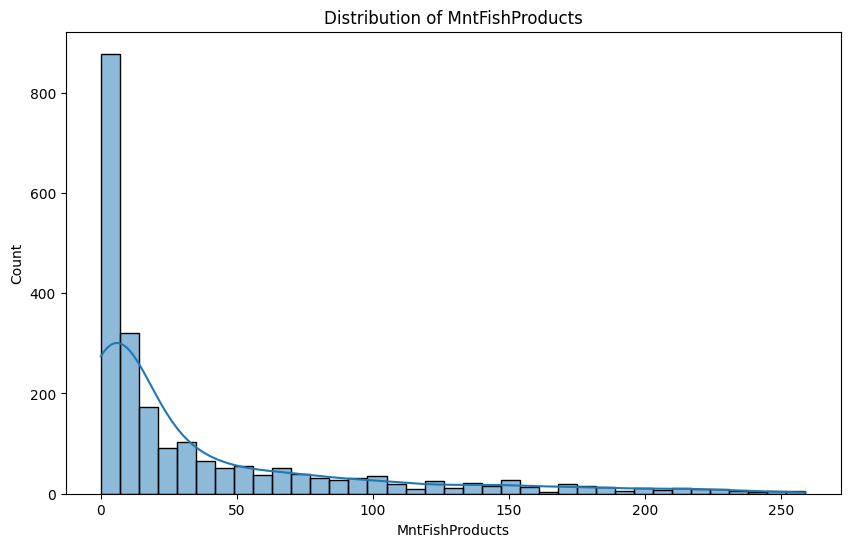

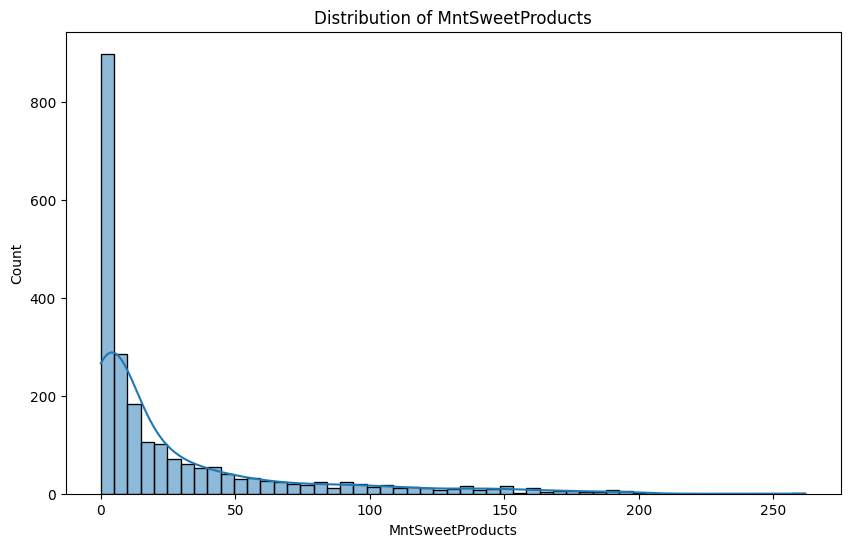

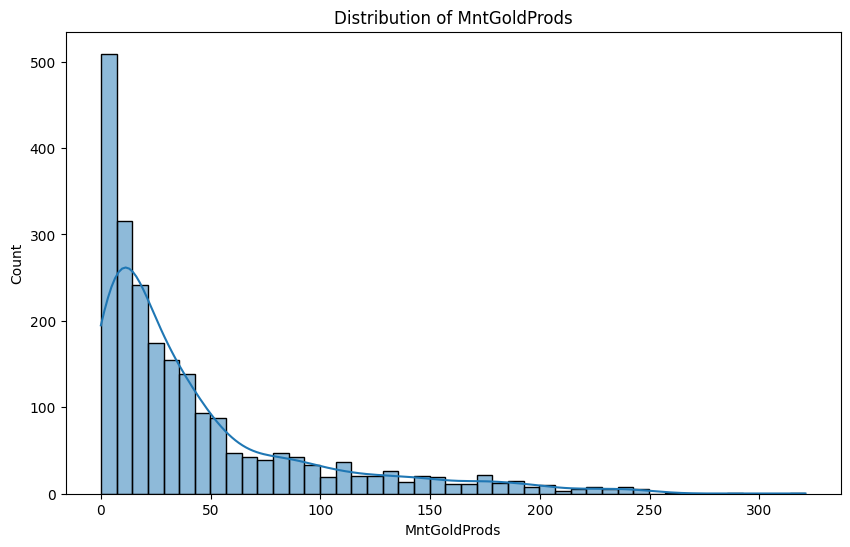

In [ ]:
#aggregate histogram visualization


continous_numeric_columns = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for col in continous_numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.title(f'Distribution of {col}')
    sns.histplot(data_cleaned[col], kde=True)

    plt.show()



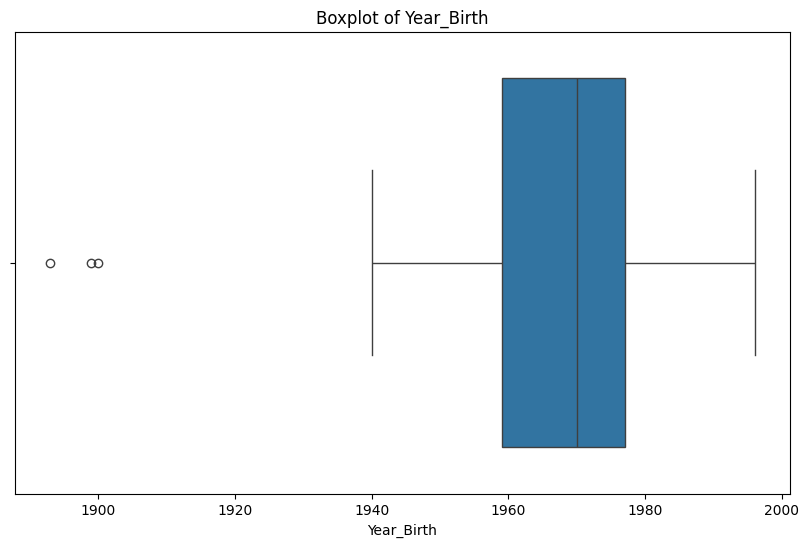

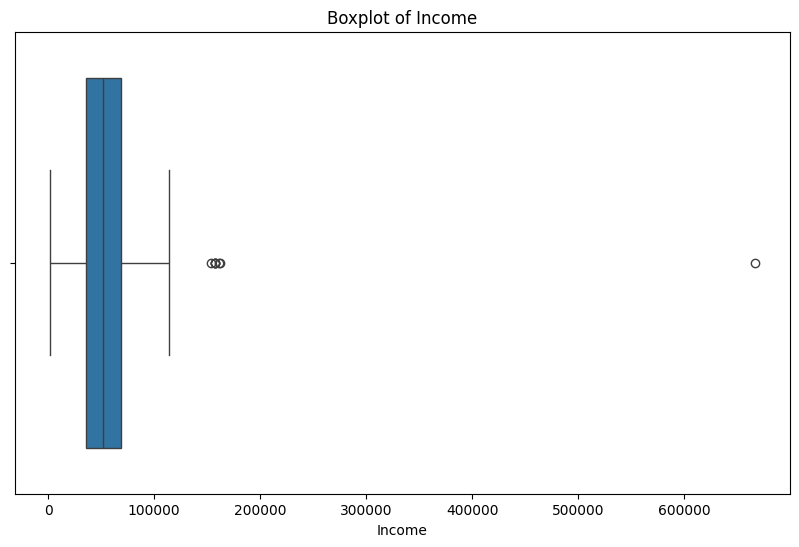

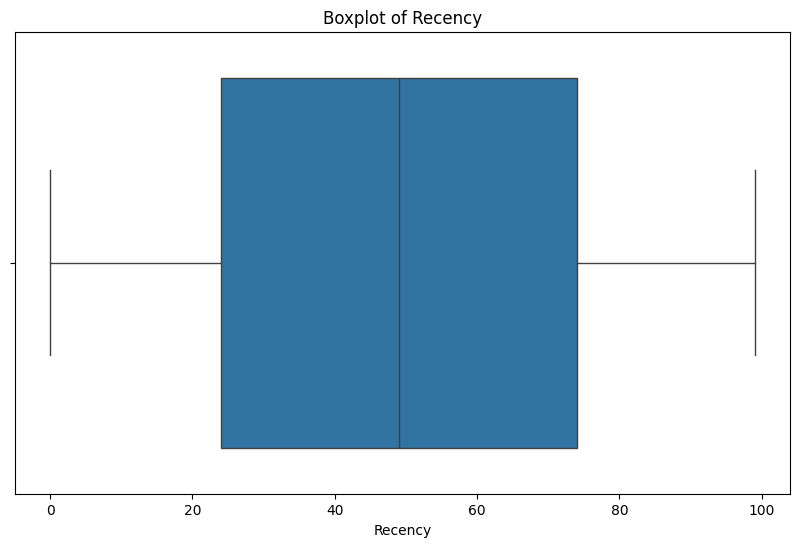

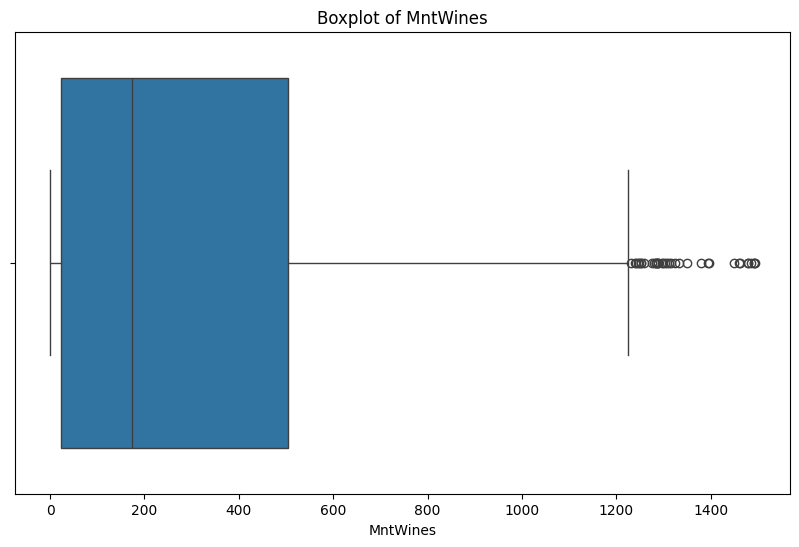

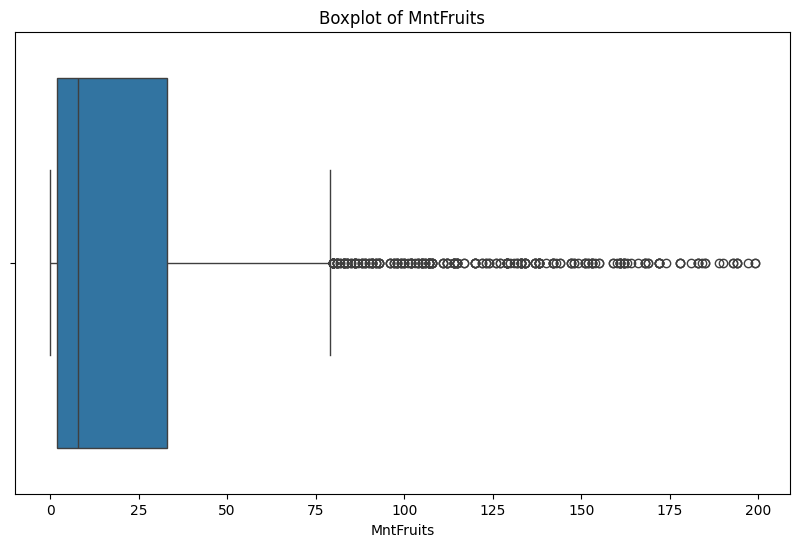

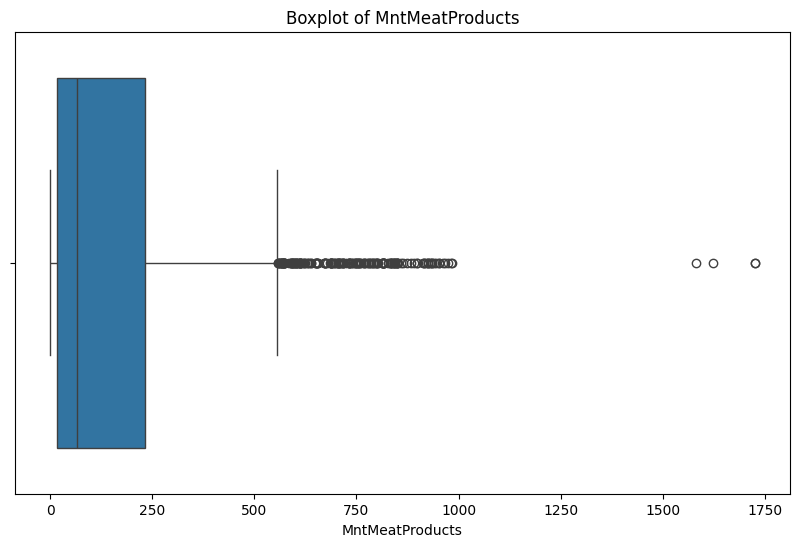

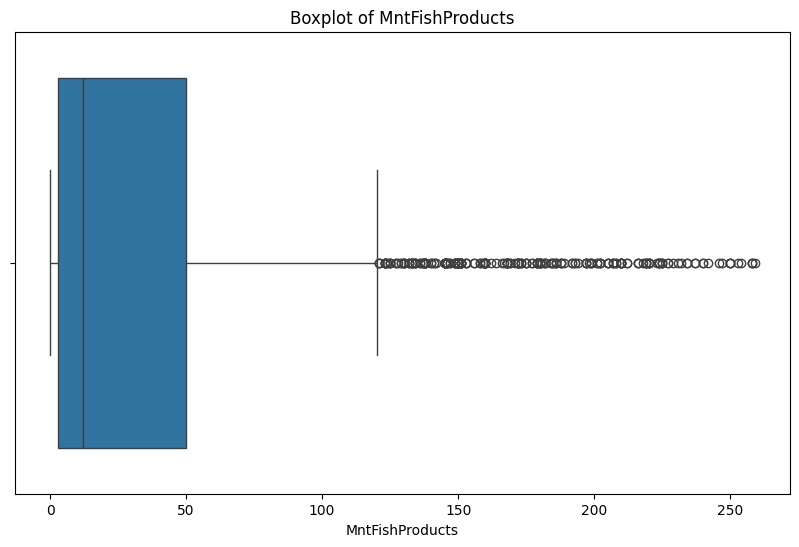

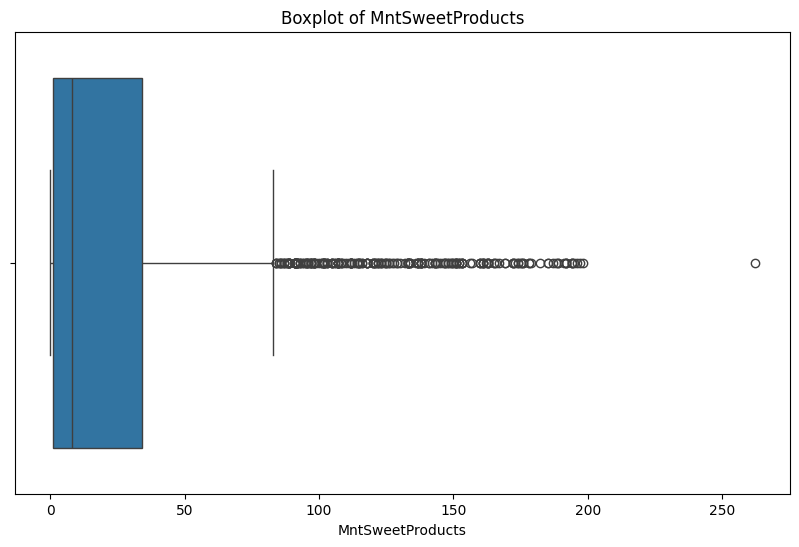

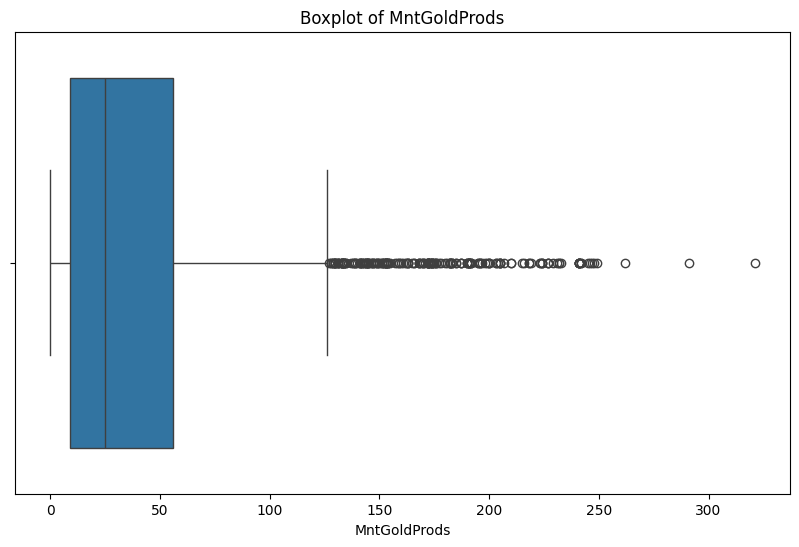

In [ ]:
# check outlier in boxplot

for col in continous_numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.title(f'Boxplot of {col}')
    sns.boxplot(x = data_cleaned[col])

    plt.show()

In [ ]:
#checking the normal distribution hipothesis

for col in continous_numeric_columns:
    statistic, p_value = normaltest(data_cleaned[col])
    if p_value < 0.05:
        print(f"{col} is not normally distributed.")
    else:
        print(f"{col} is normally distributed.")

Year_Birth is not normally distributed.
Income is not normally distributed.
Recency is not normally distributed.
MntWines is not normally distributed.
MntFruits is not normally distributed.
MntMeatProducts is not normally distributed.
MntFishProducts is not normally distributed.
MntSweetProducts is not normally distributed.
MntGoldProds is not normally distributed.


In [ ]:
#because the data is not normally distributed so we used mann whitney method.
#check if there are a significant differences between the numeric columns and income



for col in continous_numeric_columns:
    statistic, p_value = mannwhitneyu(data_cleaned[col], data_cleaned['Income'])
    if p_value < 0.05:
        print(f"Reject Null hipothesis, There is a significant difference between {col} and Income.")
    else:
        print(f"Fail to reject Null hipothesis, There is no significant difference between {col} and Income.")

Reject Null hipothesis, There is a significant difference between Year_Birth and Income.
Fail to reject Null hipothesis, There is no significant difference between Income and Income.
Reject Null hipothesis, There is a significant difference between Recency and Income.
Reject Null hipothesis, There is a significant difference between MntWines and Income.
Reject Null hipothesis, There is a significant difference between MntFruits and Income.
Reject Null hipothesis, There is a significant difference between MntMeatProducts and Income.
Reject Null hipothesis, There is a significant difference between MntFishProducts and Income.
Reject Null hipothesis, There is a significant difference between MntSweetProducts and Income.
Reject Null hipothesis, There is a significant difference between MntGoldProds and Income.


## Correlation Matrix

we use spearman method because of the data is not normally distributed

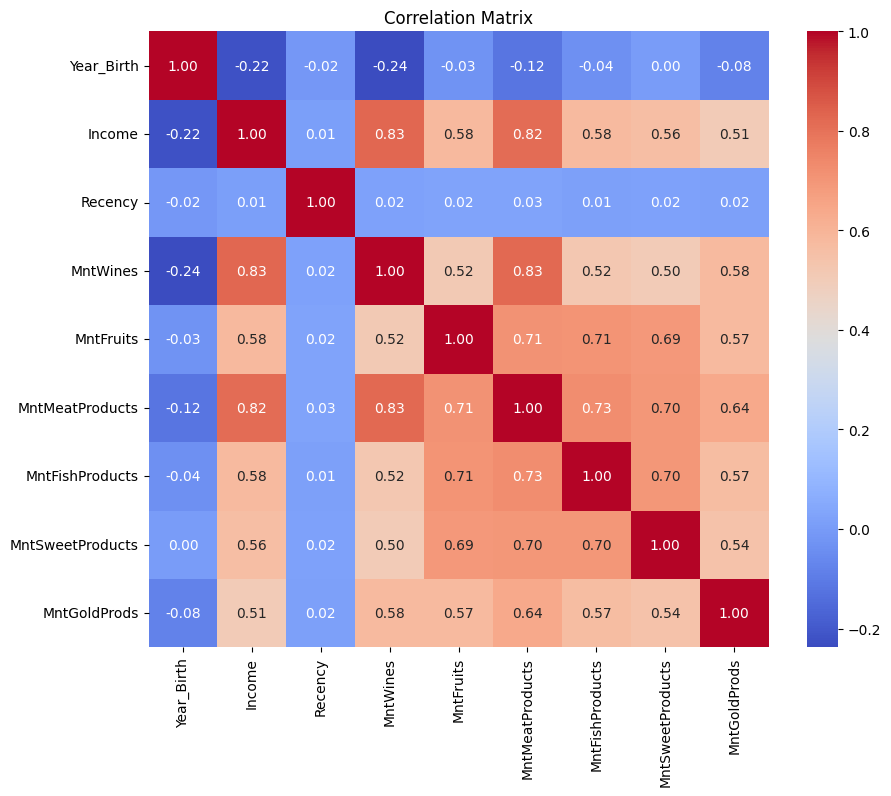

In [ ]:
correlation_matrix = data_cleaned[continous_numeric_columns].corr(method="spearman")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Insight from Numerical Correlation

Insights from the Correlation Matrix

1. **Spending Correlations**:
   - Customers who spend more in one category (e.g., meat, wine, fruits) tend to spend more in others.

2. **Income Impact**:
   - Higher income is moderately correlated with higher spending, especially on wines and meat products.

3. **Birth Year (Age)**:
   - Older individuals (lower `Year_Birth`) show weak negative correlations with income and spending.

4. **Recency**:
   - Minimal or no relationship with other variables, suggesting recent interactions don't significantly influence spending or income patterns.

**Summary**: Spending behaviors are closely interlinked, with income playing a key role in driving higher expenditures across categories.


### Encoding for more advance correlation analysis

In [ ]:
ordinal_mappings = {
    "Education": {
        "Basic": 1,
        "Graduation": 2,
        "Master": 3,
        "PhD": 4
    },
    "Marital_Status": {
        "Single": 1,
        "Together": 2,
        "Married": 3,
        "Divorced": 4,
        "Widow": 5,
        "other": 6
    },
    }


In [ ]:
data_cleaned_fixed = data_cleaned.copy()

data_cleaned_fixed.replace(ordinal_mappings, inplace=True)


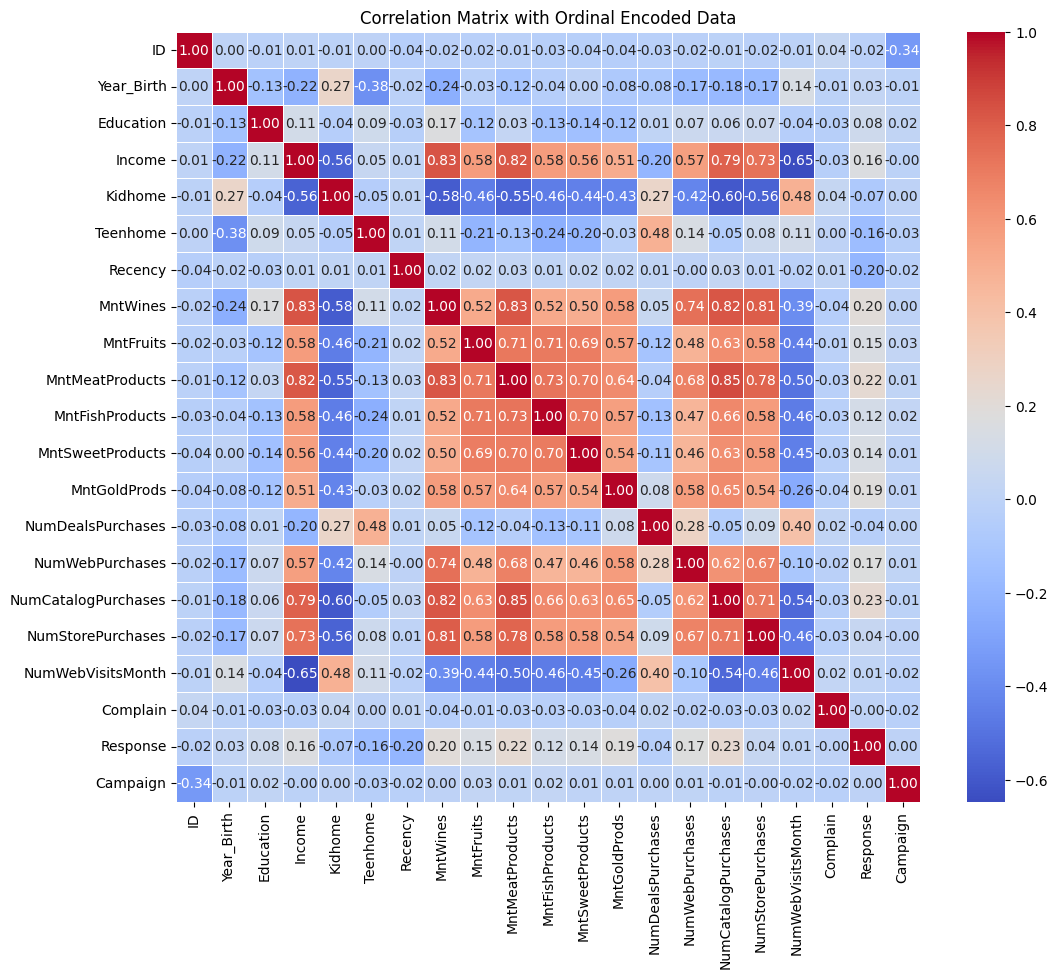

In [ ]:

# Calculate the correlation matrix
correlation_matrix = data_cleaned_fixed.corr(method="spearman",numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix with Ordinal Encoded Data")
plt.show()

In [ ]:
strongest_correlation = correlation_matrix.stack().reset_index()
strongest_correlation.columns = ['Variable 1', 'Variable 2', 'Correlation']
strongest_correlation.sort_values(by='Correlation', ascending=False, inplace=True)

strongest_correlation = strongest_correlation[strongest_correlation['Variable 1'] != strongest_correlation['Variable 2']]



strongest_correlation[::2].head(20)

,Variable 1,Variable 2,Correlation
324,NumCatalogPurchases,MntMeatProducts,0.85
70,Income,MntWines,0.83
156,MntWines,MntMeatProducts,0.83
162,MntWines,NumCatalogPurchases,0.82
192,MntMeatProducts,Income,0.82
163,MntWines,NumStorePurchases,0.81
318,NumCatalogPurchases,Income,0.79
345,NumStorePurchases,MntMeatProducts,0.78
161,MntWines,NumWebPurchases,0.74
79,Income,NumStorePurchases,0.73


In [ ]:
strongest_negative_correlation = strongest_correlation.sort_values(by='Correlation', ascending=True)

strongest_negative_correlation[::2].head(20)

,Variable 1,Variable 2,Correlation
80,Income,NumWebVisitsMonth,-0.65
319,NumCatalogPurchases,Kidhome,-0.60
91,Kidhome,MntWines,-0.58
67,Income,Kidhome,-0.56
340,NumStorePurchases,Kidhome,-0.56
93,Kidhome,MntMeatProducts,-0.55
372,NumWebVisitsMonth,NumCatalogPurchases,-0.54
206,MntMeatProducts,NumWebVisitsMonth,-0.50
367,NumWebVisitsMonth,MntFishProducts,-0.46
353,NumStorePurchases,NumWebVisitsMonth,-0.46


**Correlation Matrix Analysis**

Key Insights

1. **Spending Patterns**:
   - High correlation between **MntMeatProducts** and **MntWines** (0.82): Customers spending on one product category tend to spend on others.
   - Moderate correlation between **MntMeatProducts** and **MntFishProducts** (0.73): Indicates linked preferences across product categories.

2. **Income Correlation**:
   - Strong correlation between **Income** and:
     - **MntWines** (0.83): Wealthier individuals spend more on wines.
     - **MntMeatProducts** (0.82): Indicates a positive relationship between income and meat product spending.

3. **Purchase Channels**:
   - **NumCatalogPurchases** correlates with **Income** (0.79): Catalog shoppers tend to have higher incomes.
   - **NumStorePurchases** and **NumWebPurchases** show moderate correlations with spending patterns, indicating cross-channel purchase behavior.

 <br>
---
 <br>

**Negative Correlation**

- **Income vs. NumWebVisitsMonth (-0.65):** Wealthier individuals visit fewer websites, possibly relying less on online shopping.
- **NumCatalogPurchases vs. Kidhome (-0.60):** More kids at home lead to fewer catalog purchases due to time or budget constraints.
- **Kidhome vs. MntWines (-0.58):** Families with kids spend less on wine, prioritizing essentials.
- **Income vs. Kidhome (-0.56):** Higher-income households have fewer kids, reflecting lifestyle or socioeconomic factors.
- **NumStorePurchases vs. Kidhome (-0.56):** More kids correlate with fewer store purchases, possibly favoring bulk buying or logistical challenges.





## Visualization

we will perform and EDA to the Cleaned data set

#### Top Product by Revenue

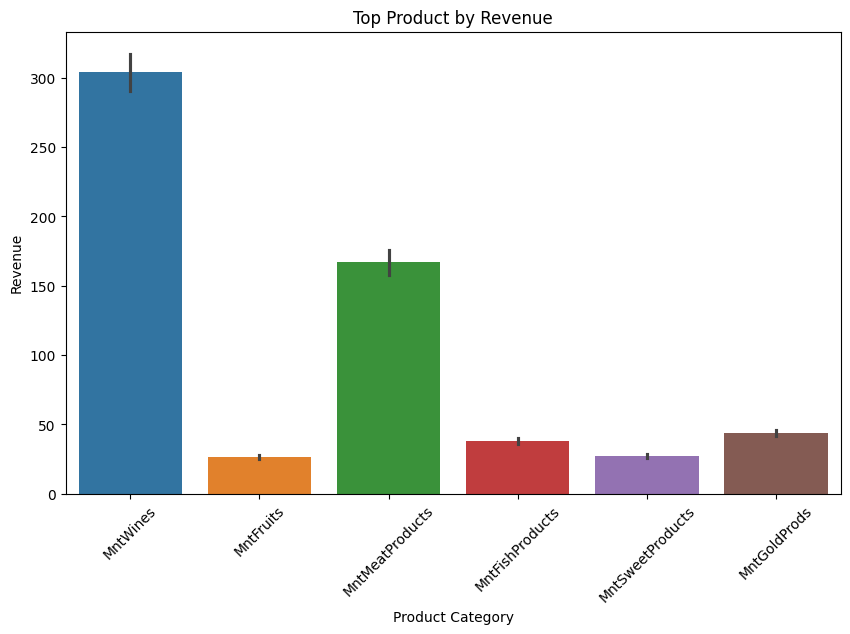

In [ ]:

plt.figure(figsize=(10, 6))
plt.title('Top Product by Revenue')
sns.barplot(data_cleaned_fixed[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts","MntGoldProds"]])

plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.show()

#### Wine Sweet Wine

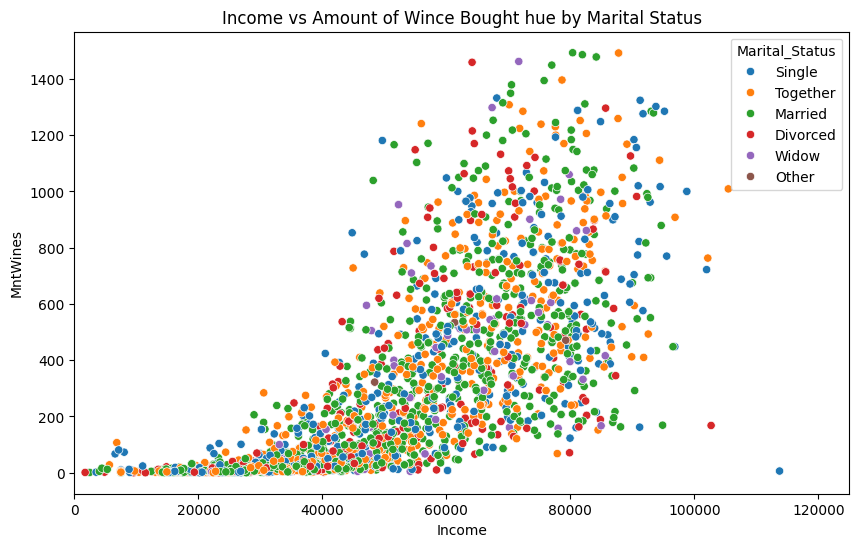

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Income vs Amount of Wince Bought hue by Marital Status')
sns.scatterplot(data = data_cleaned, x="Income", y="MntWines", hue="Marital_Status")
plt.xlim(0, 125000) #limit for outlier
plt.show()

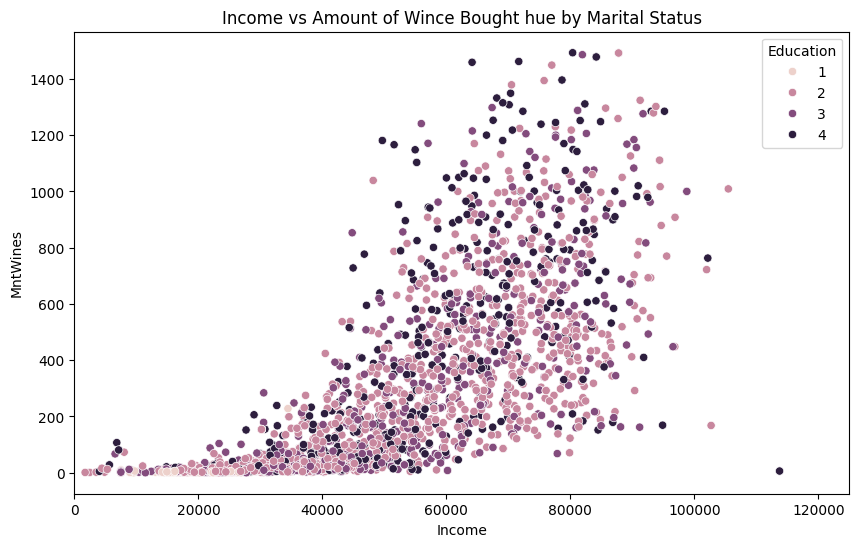

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Income vs Amount of Wince Bought hue by Marital Status')
sns.scatterplot(data = data_cleaned_fixed, x="Income", y="MntWines", hue="Education")
plt.xlim(0, 125000) #to see the data without outlier
plt.show()

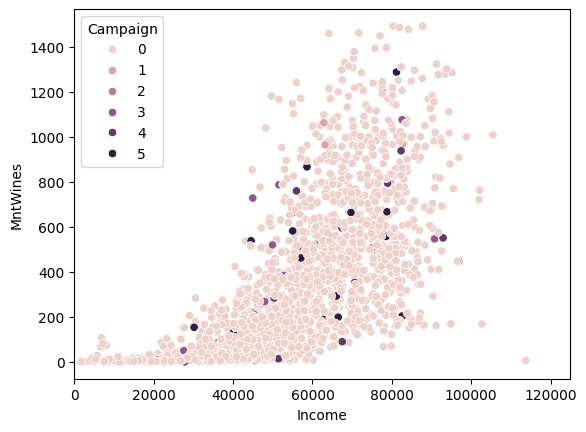

In [ ]:
sns.scatterplot(data = data_cleaned_fixed, x="Income", y="MntWines", hue="Campaign")

plt.xlim(0, 125000) #to see the data without outlier
plt.show()

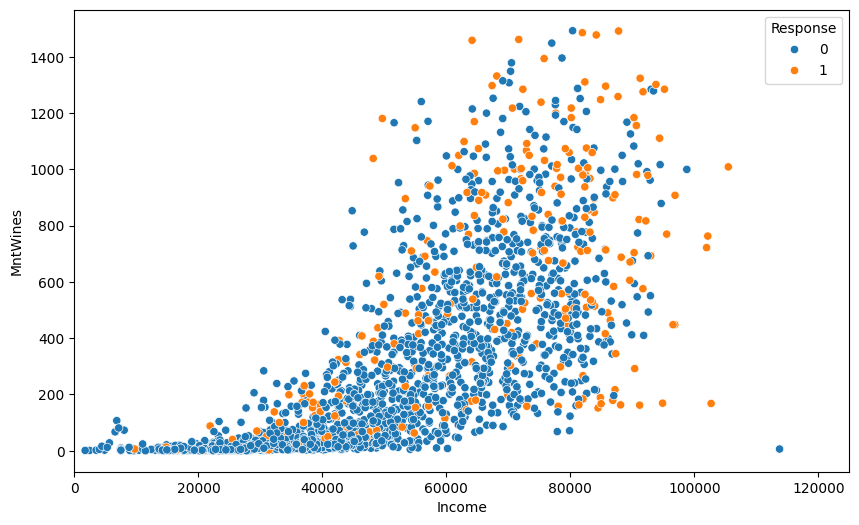

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = data_cleaned_fixed, x="Income", y="MntWines", hue="Response")
plt.xlim(0, 125000) #to see the data without outlier
plt.show()

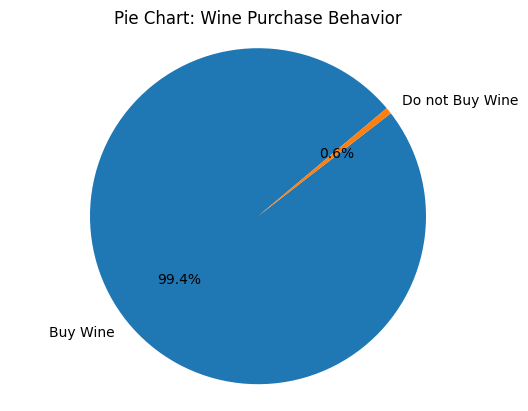

In [ ]:

wine_buyers = len(data_cleaned_fixed[data_cleaned_fixed['MntWines'] > 0])
non_wine_buyers = len(data_cleaned_fixed[data_cleaned_fixed['MntWines'] == 0])


sizes = [wine_buyers, non_wine_buyers]

fig, ax = plt.subplots()
ax.pie(sizes, labels=['Buy Wine', 'Do not Buy Wine'], autopct='%1.1f%%',
       startangle=40)
ax.axis('equal')
plt.title('Pie Chart: Wine Purchase Behavior')
plt.show()

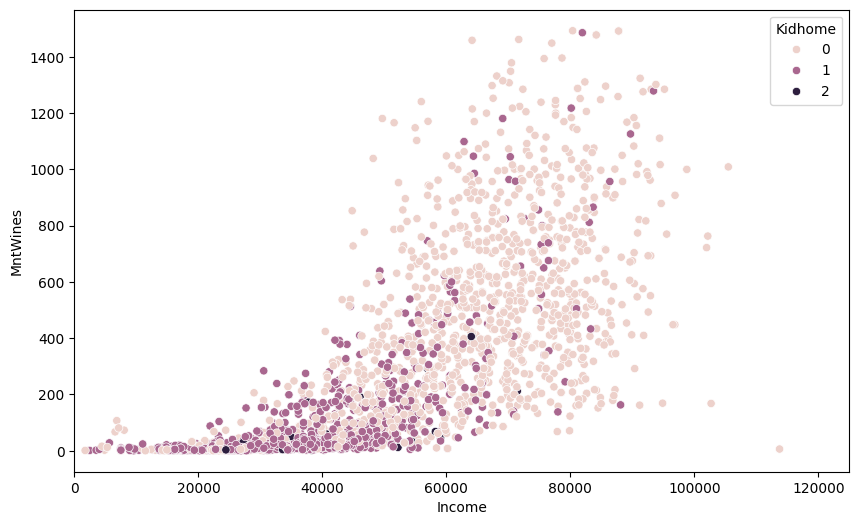

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = data_cleaned_fixed, x="Income", y="MntWines", hue="Kidhome")
plt.xlim(0, 125000) #to see the data without outlier
plt.show()

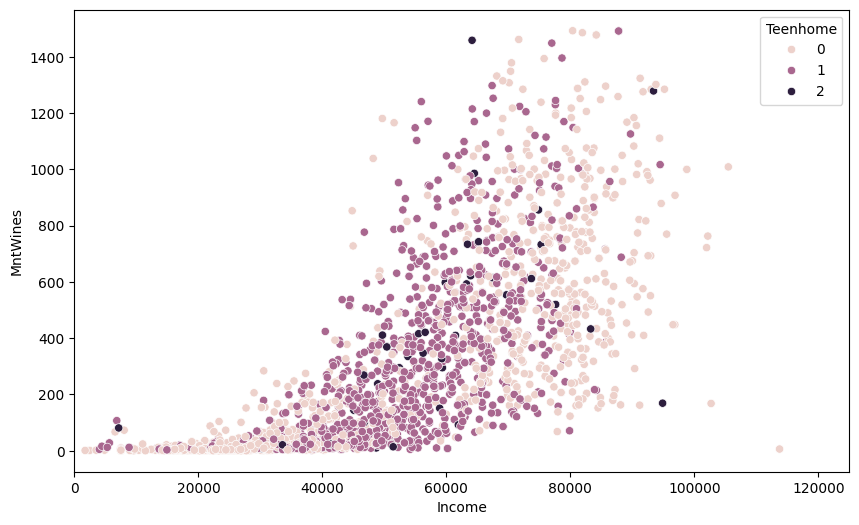

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = data_cleaned_fixed, x="Income", y="MntWines", hue="Teenhome")
plt.xlim(0, 125000) #to see the data without outlier
plt.show()

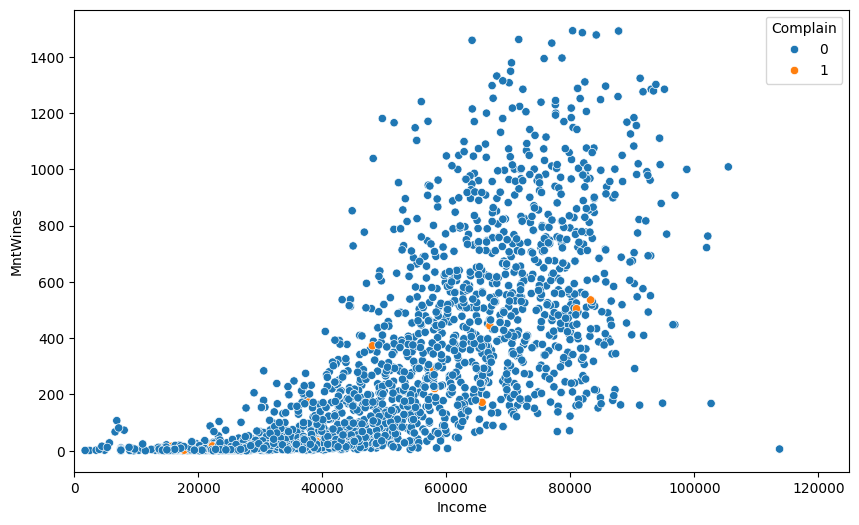

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = data_cleaned_fixed, x="Income", y="MntWines", hue="Complain")
plt.xlim(0, 125000) #to see the data without outlier
plt.show()

### Campaign analysis


In [ ]:
df_retention = data_cleaned_fixed.copy()

In [ ]:

cohort_data = df_retention[['ID', 'Campaign']]

campaign_cohort = cohort_data.groupby('Campaign').size().reset_index(name='Customer_Count')

campaign_cohort = campaign_cohort.sort_values(by='Campaign')

campaign_cohort_excluded = campaign_cohort[campaign_cohort['Campaign'] > 0]

total_customers = campaign_cohort_excluded['Customer_Count'].sum()
campaign_cohort_excluded['Percentage'] = (
    campaign_cohort_excluded['Customer_Count'] / total_customers * 100
)



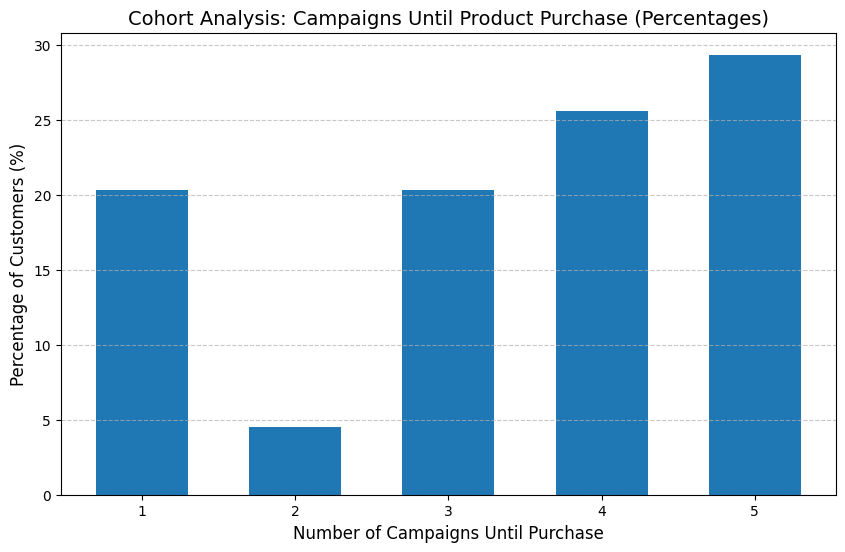

In [ ]:

#visualization
plt.figure(figsize=(10, 6))
plt.bar(campaign_cohort_excluded['Campaign'], campaign_cohort_excluded['Percentage'], width=0.6)
plt.title('Cohort Analysis: Campaigns Until Product Purchase (Percentages)', fontsize=14)
plt.xlabel('Number of Campaigns Until Purchase', fontsize=12)
plt.ylabel('Percentage of Customers (%)', fontsize=12)
plt.xticks(campaign_cohort_excluded['Campaign'], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

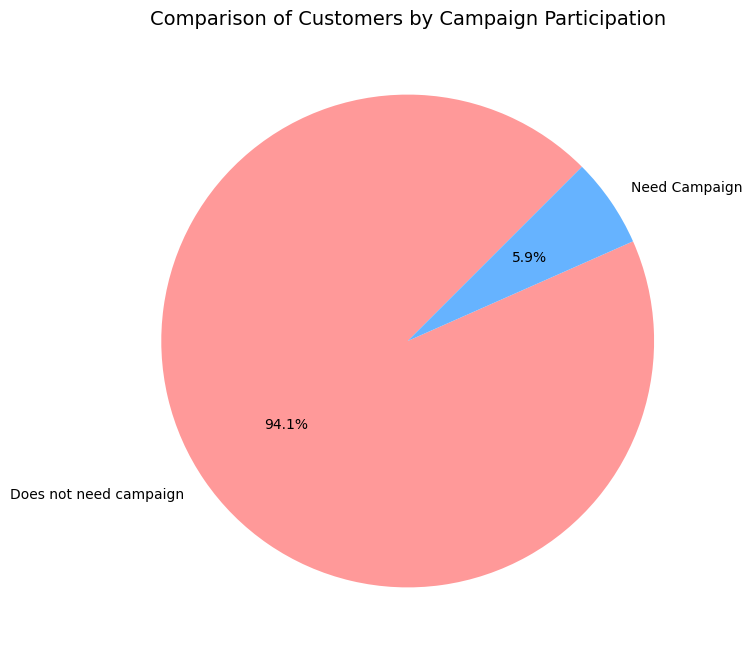

In [ ]:
# Calculate counts for Campaign 0 and Campaign > 0
campaign_0_count = campaign_cohort[campaign_cohort['Campaign'] == 0]['Customer_Count'].sum()
campaign_more_than_0_count = campaign_cohort_excluded['Customer_Count'].sum()

# Data for the pie chart
labels = ['Does not need campaign', 'Need Campaign']
sizes = [campaign_0_count, campaign_more_than_0_count]
colors = ['#ff9999', '#66b3ff']


# Create the pie chart
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45, colors=colors)
plt.title('Comparison of Customers by Campaign Participation', fontsize=14)
plt.show()


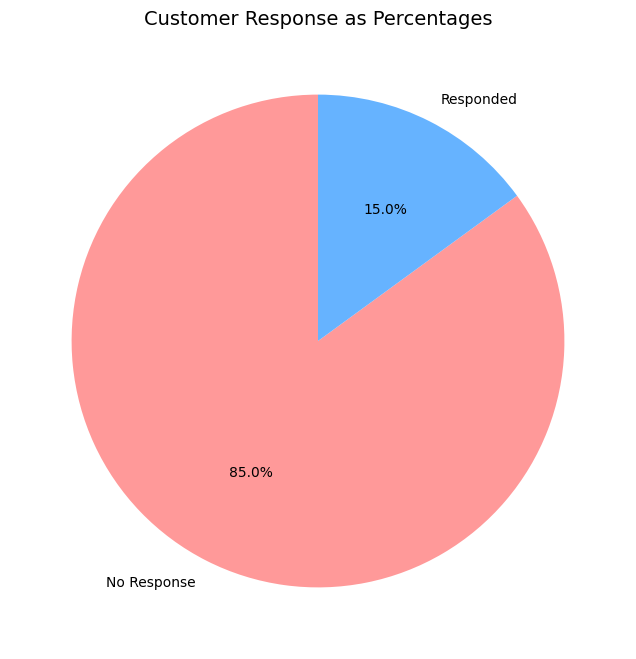

In [ ]:
response_percentages = data_cleaned_fixed['Response'].value_counts(normalize=True) * 100

response_labels = response_percentages.index.map({0: 'No Response', 1: 'Responded'})
response_sizes = response_percentages.values

plt.figure(figsize=(8, 8))
plt.pie(response_sizes, labels=response_labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Customer Response as Percentages', fontsize=14)
plt.show()


In [ ]:
# Grouping by Campaign and summing NumDealsPurchases to count all discounted product purchases per campaign
discounted_purchases_by_campaign = data_cleaned_fixed.groupby('Campaign')['NumDealsPurchases'].sum().reset_index()

# Renaming columns for clarity
discounted_purchases_by_campaign.columns = ['Campaign', 'Total_Discounted_Purchases']



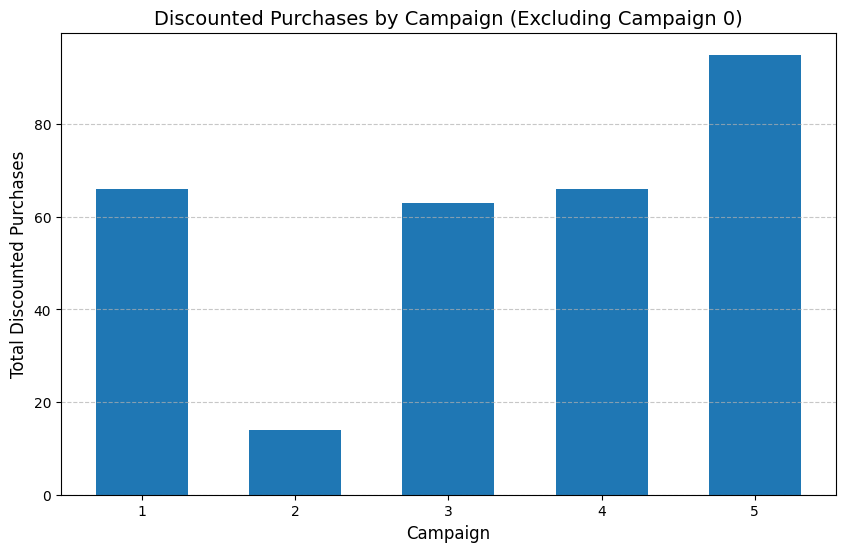

In [ ]:
# Exclude Campaign 0 from the dataset
discounted_purchases_by_campaign_excluded = discounted_purchases_by_campaign[discounted_purchases_by_campaign['Campaign'] > 0]

# Plotting discounted purchases by campaign excluding Campaign 0
plt.figure(figsize=(10, 6))
plt.bar(discounted_purchases_by_campaign_excluded['Campaign'], discounted_purchases_by_campaign_excluded['Total_Discounted_Purchases'], width=0.6)
plt.title('Discounted Purchases by Campaign (Excluding Campaign 0)', fontsize=14)
plt.xlabel('Campaign', fontsize=12)
plt.ylabel('Total Discounted Purchases', fontsize=12)
plt.xticks(discounted_purchases_by_campaign_excluded['Campaign'], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


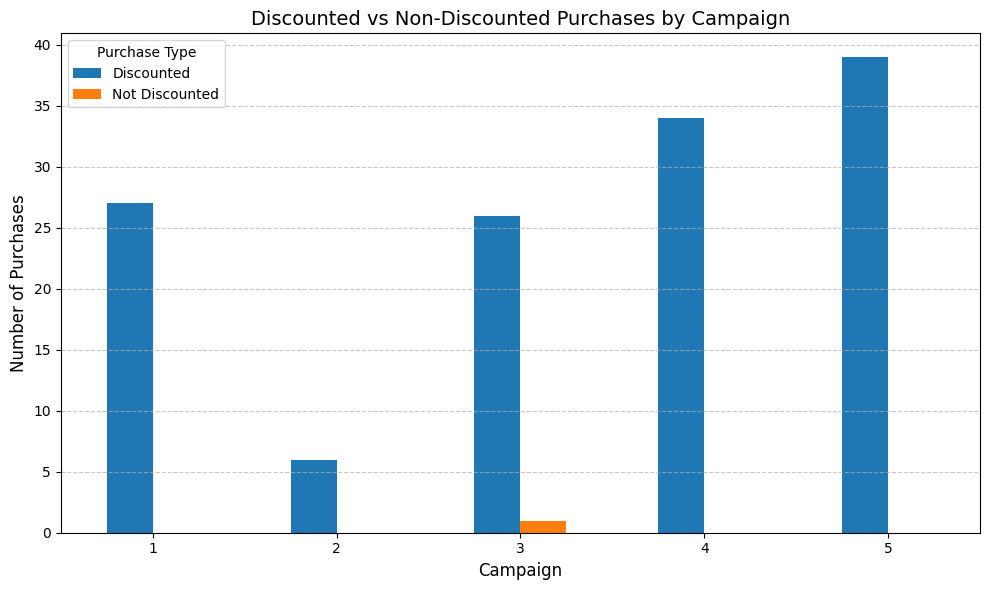

In [ ]:
import numpy as np

# Create a new column to categorize purchases as discounted or non-discounted
data_cleaned_fixed['Discounted'] = np.where(data_cleaned_fixed['NumDealsPurchases'] > 0, 'Discounted', 'Not Discounted')

# Group by Campaign and Discounted category to count purchases
discount_vs_non_discount = data_cleaned_fixed.groupby(['Campaign', 'Discounted']).size().reset_index(name='Count')

# Exclude Campaign 0
discount_vs_non_discount = discount_vs_non_discount[discount_vs_non_discount['Campaign'] > 0]

# Pivoting the data for visualization
discount_pivot = discount_vs_non_discount.pivot(index='Campaign', columns='Discounted', values='Count').fillna(0)

# Plotting a stacked bar chart
discount_pivot.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Discounted vs Non-Discounted Purchases by Campaign', fontsize=14)
plt.xlabel('Campaign', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Purchase Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


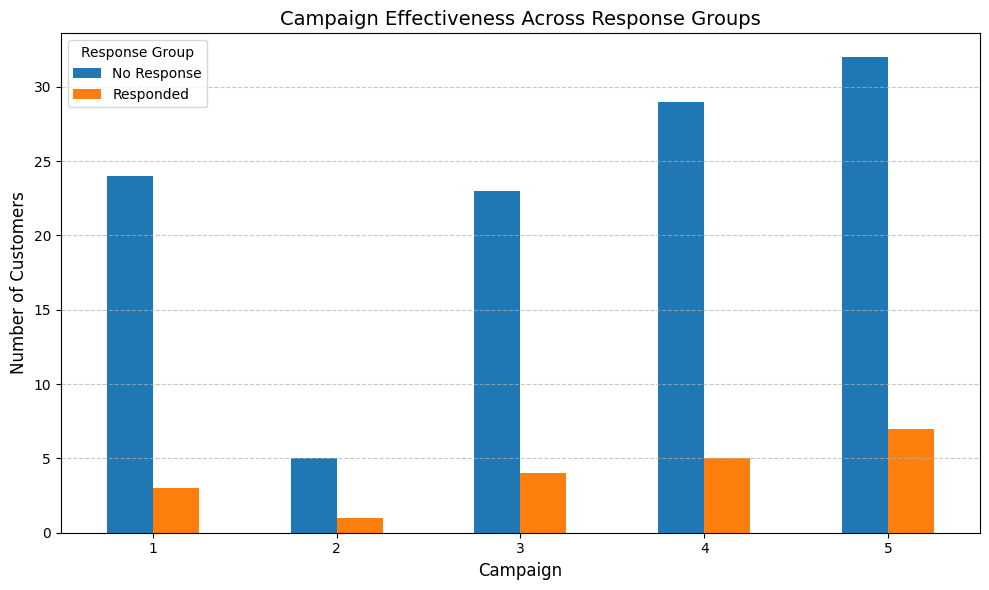

In [ ]:
campaign_response_group = data_cleaned_fixed.groupby(['Campaign', 'Response']).size().reset_index(name='Count')

campaign_response_group = campaign_response_group[campaign_response_group['Campaign'] > 0]

# Pivot the data for visualization
campaign_response_pivot = campaign_response_group.pivot(index='Campaign', columns='Response', values='Count').fillna(0)

campaign_response_pivot.columns = ['No Response', 'Responded']

# Plotting a stacked bar chart to compare campaign effectiveness across response groups
campaign_response_pivot.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Campaign Effectiveness Across Response Groups', fontsize=14)
plt.xlabel('Campaign', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Response Group', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


###In Time Period

#### Monthly

<class 'pandas.core.series.Series'>
Index: 2265 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
926 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 35.4 KB


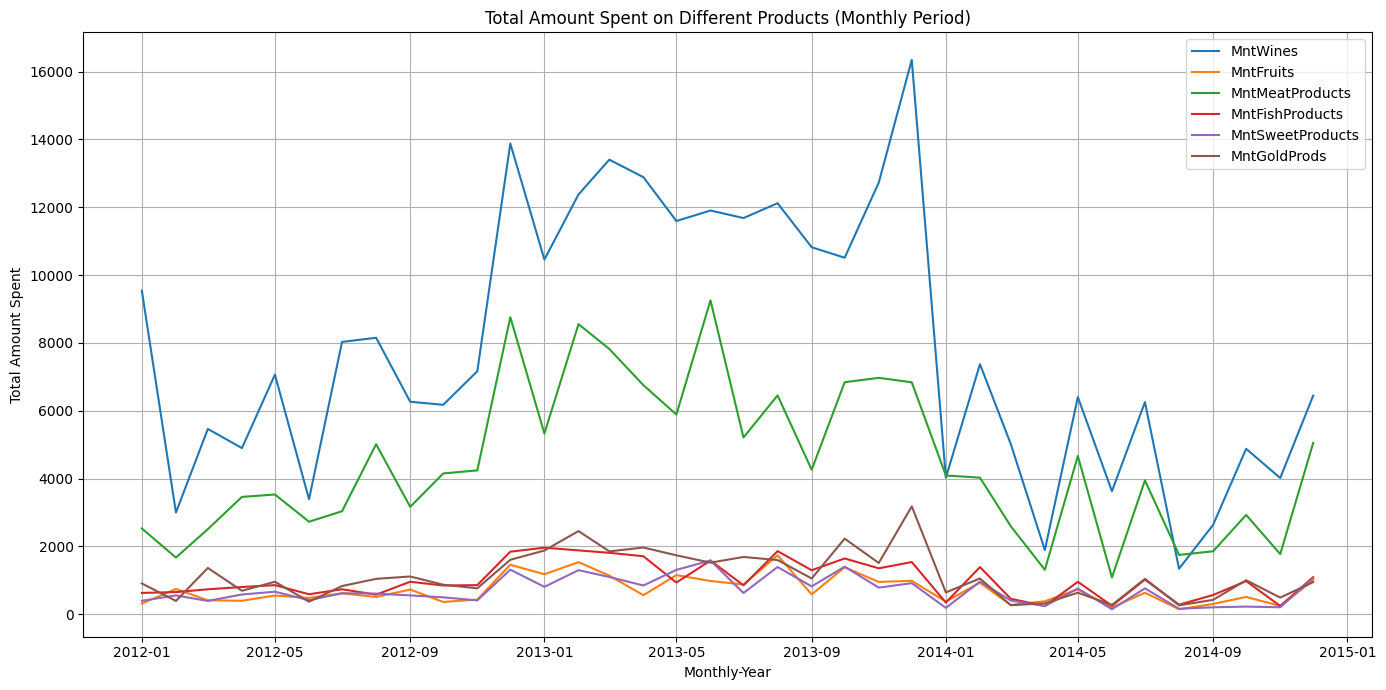

In [ ]:
# Check the data type of 'Dt_Customer'
data_cleaned['Dt_Customer'] = pd.to_datetime(data_cleaned['Dt_Customer'], errors='coerce')

# Verify the data type and non-null values
data_cleaned['Dt_Customer'].info()

# Repeat the quarter-year extraction process
data_cleaned['Quarter_Year'] = data_cleaned['Dt_Customer'].dt.to_period('M')

# Aggregate data by quarter-year
month_data = data_cleaned.groupby('Quarter_Year')[
    ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
].sum()

# Convert the PeriodIndex to datetime for better plotting
month_data.index = month_data.index.to_timestamp()

# Plot the aggregated data by Month-year
plt.figure(figsize=(14, 7))
for column in month_data.columns:
    plt.plot(month_data.index, month_data[column], label=column)

# Add labels, legend, and title
plt.xlabel('Monthly-Year')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent on Different Products (Monthly Period)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


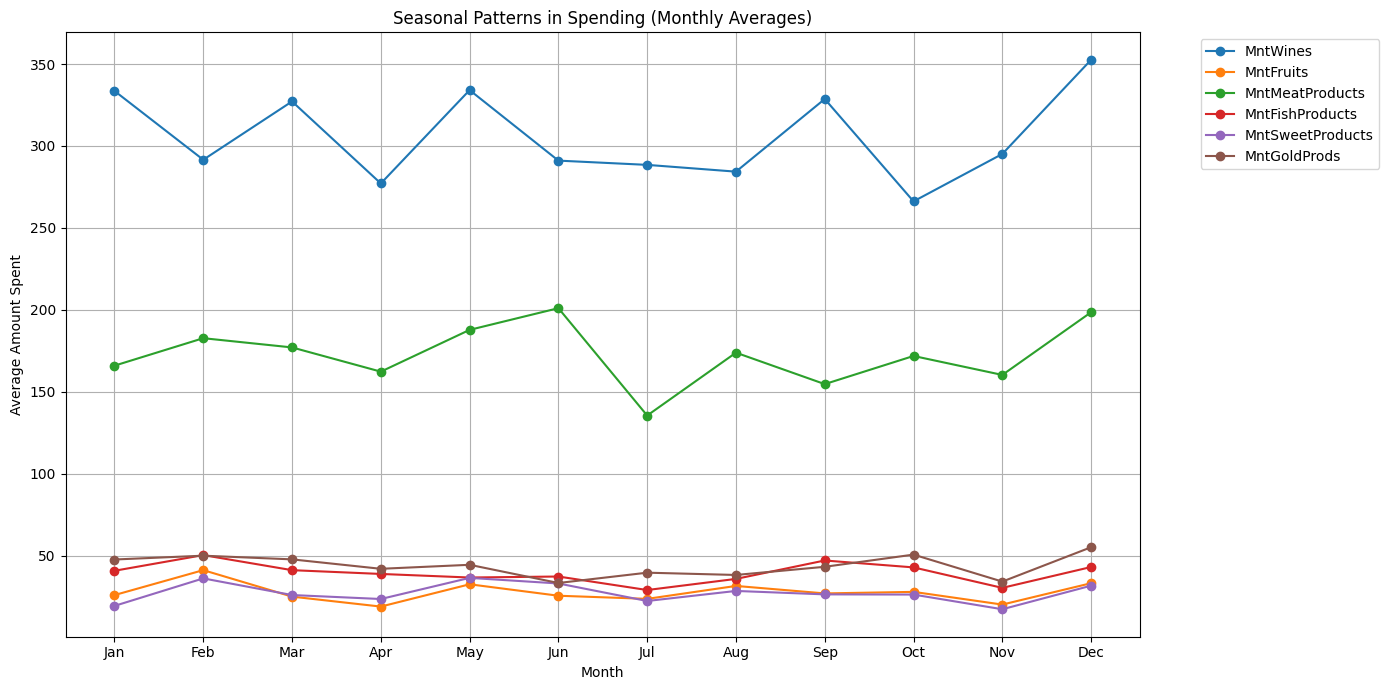

In [ ]:
data_cleaned['Month'] = data_cleaned['Dt_Customer'].dt.month

monthly_aggregate = data_cleaned.groupby('Month')[
    ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
].mean()

plt.figure(figsize=(14, 7))
for column in monthly_aggregate.columns:
    plt.plot(monthly_aggregate.index, monthly_aggregate[column], marker='o', label=column)

plt.xlabel('Month')
plt.ylabel('Average Amount Spent')
plt.title('Seasonal Patterns in Spending (Monthly Averages)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot
plt.grid(True)
plt.tight_layout()
plt.show()


**Quarterly Trends Summary**
1. MntWines
- Peaks in spending align with holidays or events.
- Generally stable with occasional dips.

2. MntFruits
- Consistently stable demand with minimal fluctuations.

3. MntMeatProducts
- Clear seasonal spikes, likely during festive periods.

4. MntFishProducts
- Relatively stable with minor quarterly increases.

5. MntSweetProducts
- Sporadic spikes, probably tied to celebrations or holidays.

6. MntGoldProds
- Distinct peaks during gift-giving seasons, low demand otherwise.

Overall
- **Seasonal Trends**: Dominant in wines, meats, and gold products.
- **Steady Demand**: Observed in fruits and fish products.


### Channel Performance


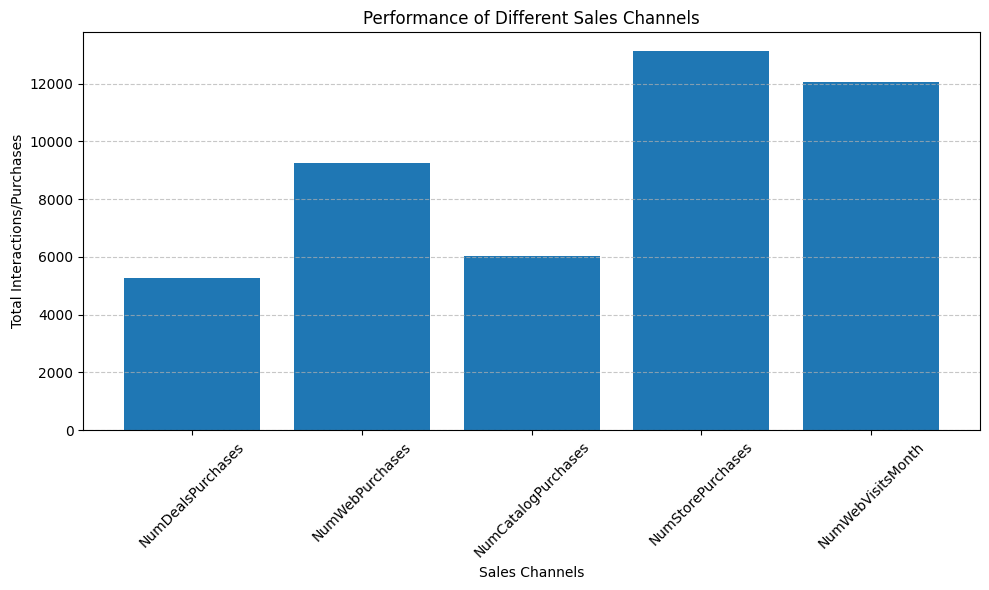

In [ ]:
channel_performance = data_cleaned[[
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
]].sum()

channel_performance_df = channel_performance.to_frame(name='Total').reset_index()
channel_performance_df.rename(columns={'index': 'Channel'}, inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(channel_performance_df['Channel'], channel_performance_df['Total'])
plt.xlabel('Sales Channels')
plt.xticks(rotation=45)
plt.ylabel('Total Interactions/Purchases')
plt.title('Performance of Different Sales Channels')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


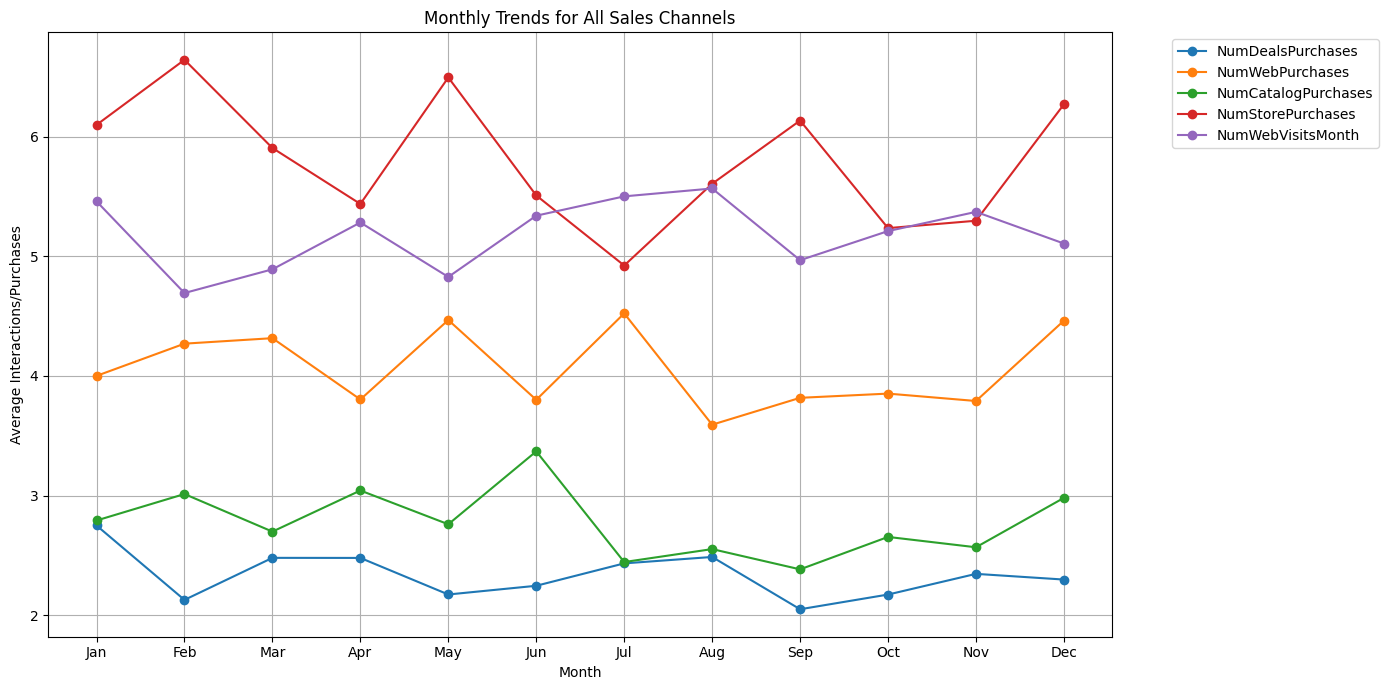

In [ ]:
all_channels = [
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth'
]
monthly_all_channels = data_cleaned.groupby('Month')[all_channels].mean()

plt.figure(figsize=(14, 7))
for channel in monthly_all_channels.columns:
    plt.plot(
        monthly_all_channels.index,
        monthly_all_channels[channel],
        marker='o',
        label=channel
    )

# Add labels, legend, and title
plt.xlabel('Month')
plt.ylabel('Average Interactions/Purchases')
plt.title('Monthly Trends for All Sales Channels')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.grid(True)
plt.tight_layout()
plt.show()


Insights from Monthly Channel Trends

- **November** and **August**: Peak months across most channels, likely due to seasonal promotions or holidays.
- **June**: Consistently lower activity, suggesting a seasonal dip.
- **Store Purchases**: Dominates in **January** and **November**, indicating strong physical sales during holiday seasons.
- **Web Interactions**: Peaks in **July** and **August**, reflecting higher online engagement.


### Family **Size**

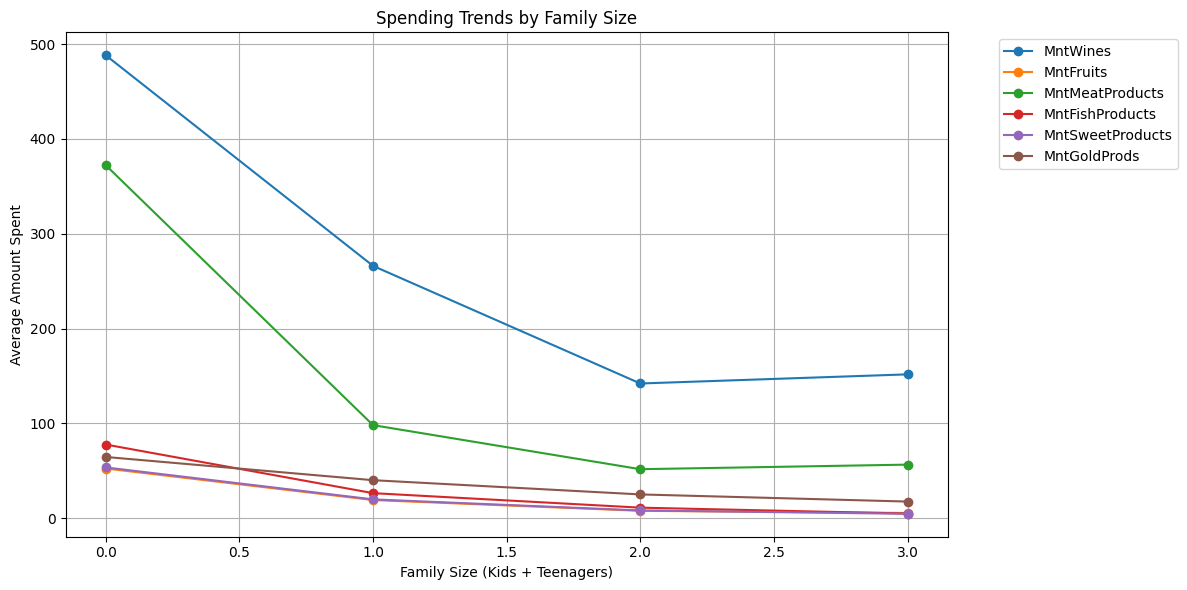

In [ ]:
data_cleaned['FamilySize'] = data_cleaned['Kidhome'] + data_cleaned['Teenhome']

# Aggregate spending data by family size
family_size_spending = data_cleaned.groupby('FamilySize')[
    ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
].mean()

plt.figure(figsize=(12, 6))
for column in family_size_spending.columns:
    plt.plot(family_size_spending.index, family_size_spending[column], marker='o', label=column)

plt.xlabel('Family Size (Kids + Teenagers)')
plt.ylabel('Average Amount Spent')
plt.title('Spending Trends by Family Size')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.grid(True)
plt.tight_layout()
plt.show()


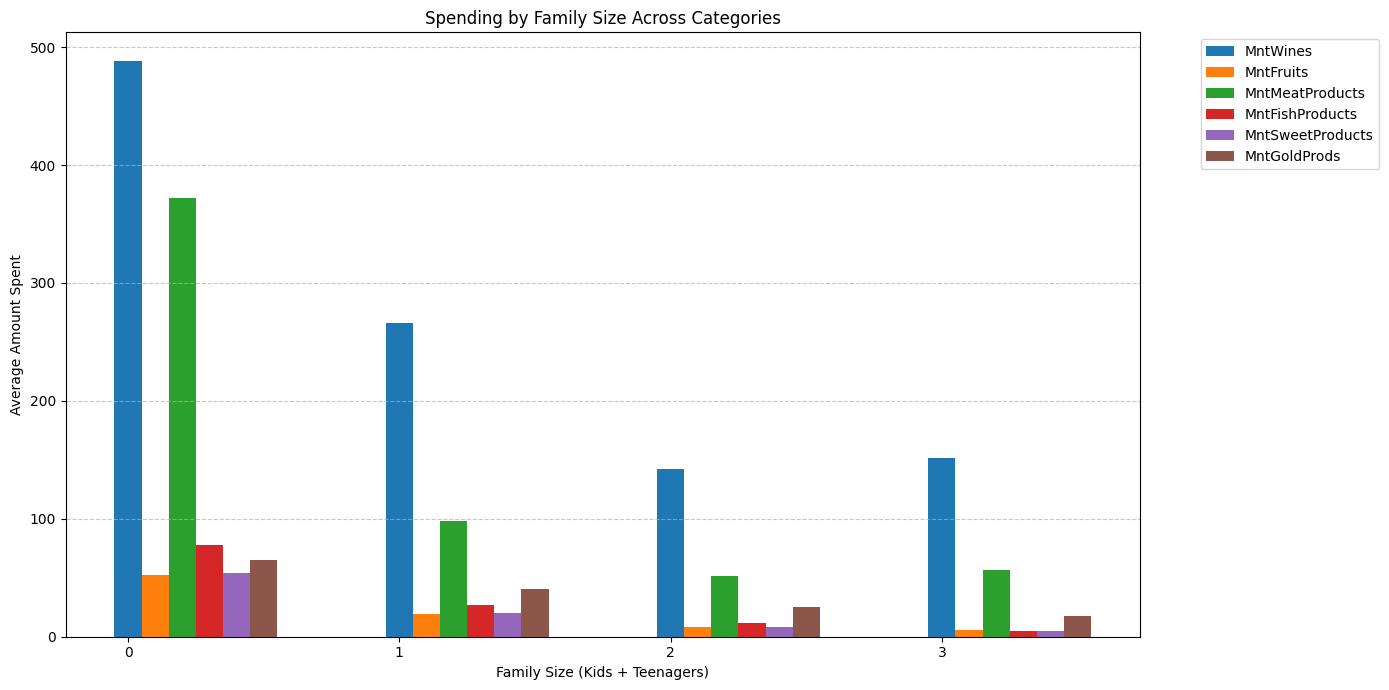

In [ ]:
plt.figure(figsize=(14, 7))
categories = family_size_spending.columns

for category in categories:
    plt.bar(
        family_size_spending.index + (0.1 * categories.get_loc(category)),
        family_size_spending[category],
        width=0.1,
        label=category,
    )

plt.xlabel('Family Size (Kids + Teenagers)')
plt.ylabel('Average Amount Spent')
plt.title('Spending by Family Size Across Categories')
plt.xticks(family_size_spending.index, family_size_spending.index)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

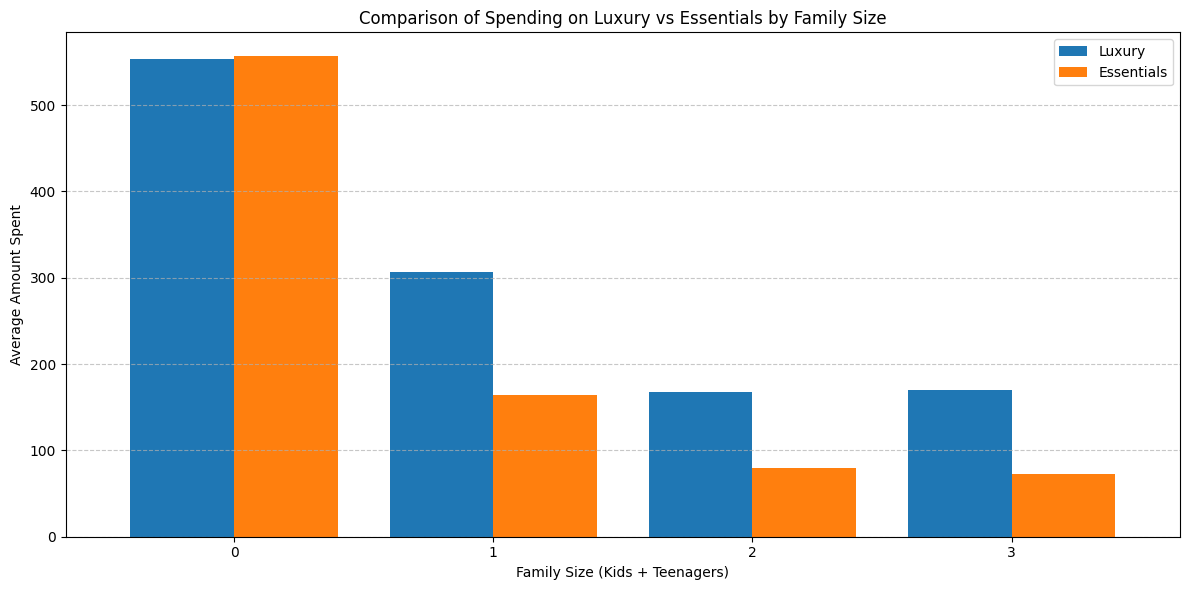

In [ ]:
# Define luxury and essential categories
luxury_categories = ['MntWines', 'MntGoldProds']
essential_categories = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']

# Aggregate spending on luxury and essentials by family size
family_size_luxury_essentials = pd.DataFrame({
    'Luxury': family_size_spending[luxury_categories].sum(axis=1),
    'Essentials': family_size_spending[essential_categories].sum(axis=1)
})

# Plot comparison of luxury and essential spending by family size
plt.figure(figsize=(10, 6))
family_size_luxury_essentials.plot(kind='bar', width=0.8, figsize=(12, 6))

# Add labels, legend, and title
plt.xlabel('Family Size (Kids + Teenagers)')
plt.ylabel('Average Amount Spent')
plt.title('Comparison of Spending on Luxury vs Essentials by Family Size')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Insights on Family Size and Spending**

1. **Spending Decreases with Family Size**
   - Families with no children (Family Size = 0) spend the most across all categories, especially on luxury items like wines and gold products.
   - Larger families (Family Size = 2 or 3) spend significantly less, focusing primarily on essentials like meat and fish products.

2. **Luxury vs. Essentials**
   - Smaller families prioritize luxury spending over essentials, likely due to higher disposable income.
   - As family size increases, spending on essentials becomes more balanced relative to luxury, though total spending in both categories decreases.

3. **Categories of Focus**
   - Luxury items such as wines and gold products dominate spending in smaller families.
   - Larger families shift their focus to necessities like meat, fruits, and fish, with sweets being a minor priority.

4. **Demographic Trends**
   - The increase in average family size over the years reflects evolving household demographics, influencing spending patterns.

5. **Seasonal Trends**
   - Regardless of family size, spending peaks during specific months (e.g., November and January), driven by holidays and seasonal events.

**Conclusion**
Smaller families or child-free households show greater flexibility for discretionary spending, while larger families prioritize essentials, reflecting budget constraints. Businesses could target luxury products to smaller families and offer essential bundles or discounts to larger households.


# **4. Conclusion and Recommendation**

## **4. Conclusion and Recommendation**

### **4.1 Conclusion**

1. **Customer Segmentation:**
   - High-income households and smaller families (or child-free) are the most valuable customer segments, spending significantly on luxury products such as wines and gold.
   - Larger families prioritize essentials like meat, fish, and fruits, with a notable decrease in spending on luxury items due to budget constraints.

2. **Seasonal and Channel Performance:**
   - Spending peaks during November and January, highlighting the impact of holiday seasons and promotional events.
   - Store purchases dominate during holidays, reflecting a preference for in-person shopping during these periods, while online channels maintain consistent engagement, peaking mid-year.

3. **Campaign Effectiveness:**
   - A significant number of customers require multiple campaign exposures to respond, emphasizing the importance of consistent and targeted outreach.
   - Campaigns focused on high-value segments yield better results, particularly when aligned with spending behaviors and product preferences.

4. **Family Dynamics and Spending Behavior:**
   - Family size and composition significantly influence spending patterns:
     - Smaller families prioritize luxury spending, leveraging higher disposable income.
     - Larger families allocate spending toward essentials, reflecting a focus on necessity-driven purchases.

5. **Spending Correlations:**
   - Strong correlations exist between spending on related categories (e.g., wine and meat), suggesting cohesive purchasing behavior among high-value customers.
   - Income is a key driver of higher spending, particularly on luxury items like wines and gold products.

6. **Retention and Loyalty Insights:**
   - Customers with higher recency values (longer gaps since last purchase) show limited correlation with spending, indicating potential churn risks.
   - Complaints are linked to reduced campaign responsiveness, emphasizing the need for better customer support to retain dissatisfied customers.

---




## **4.2 Recommendation**


1. **Enhance Targeted Marketing:**
   - **High-Value Customers**: Design campaigns that highlight luxury items (e.g., wines, gold products) for high-income households and smaller families.
   - **Budget-Conscious Families**: Offer value packs or discounts on essential products for larger families to encourage increased spending.
   - **Seasonal Promotions**: Focus marketing efforts around November and January to capitalize on holiday-driven spending spikes.

2. **Optimize Sales Channels:**
   - **In-Store Channels**: Enhance the in-store shopping experience during peak holiday months through promotions, exclusive offers, and faster service.
   - **Online Channels**: Improve the user experience and implement targeted advertising to increase engagement, especially during mid-year peaks in web activity.
   - **Catalogs**: Focus catalog marketing on high-income households, as they show stronger engagement with this channel.

3. **Refine Campaign Strategies:**
   - Develop multi-touch campaigns with tailored messaging to increase responsiveness, particularly for customers requiring multiple exposures.
   - Implement A/B testing to refine campaign messaging and offers for different segments.
   - Use loyalty programs to reward repeat customers and encourage higher spending.

4. **Address Family Dynamics:**
   - **Smaller Families**: Promote premium, high-margin products to this segment with tailored offers.
   - **Larger Families**: Bundle essential goods and offer family-friendly pricing strategies to appeal to their needs.
   - **Family-Centric Campaigns**: Introduce campaigns that resonate with family-oriented themes, such as back-to-school or holiday family packs.

5. **Retention and Support:**
   - Use recency data to identify and target customers at risk of churn with exclusive offers or personalized outreach.
   - Resolve complaints proactively and integrate satisfaction surveys to improve the customer experience.
   - Implement a feedback-driven approach to enhance retention strategies.

6. **Leverage Insights for Continuous Improvement:**
   - Regularly analyze spending patterns, seasonal trends, and campaign effectiveness to adapt marketing strategies dynamically.
   - Use correlation insights to bundle complementary products (e.g., wines and meats) in targeted promotions.
   - Invest in predictive modeling to forecast customer behavior and optimize resource allocation.

By implementing these strategies, Supermarket ABC can effectively address customer needs, enhance satisfaction, and maximize revenue growth while strengthening its competitive position in the retail market.